In [2]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [56]:
df = pd.read_csv('Data\dataset_treino.csv')

In [71]:
df = pd.read_csv('Data/dataset_teste.csv')

In [76]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,1,-0.863943,-0.539124,1.183751,-1.027550,-0.799759,-0.871219,-0.110543,-0.803186
1,2,0.593310,-0.941521,0.032311,-0.540587,-0.799759,-1.405282,-0.846799,-0.447156
2,3,-0.863943,-0.002595,0.032311,1.042043,-0.799759,-0.761264,-1.162337,-0.269141
3,4,0.884761,0.869265,0.361294,0.189858,0.571520,0.401108,0.913203,1.867037
4,5,0.010409,1.975857,0.032311,-0.540587,-0.799759,-0.667018,-0.769667,0.264903


In [ ]:
df.info()

In [ ]:
df.describe()

### Let's star with the NAs. We already know that the NA values was inputed with 0. Unfortunely, 0 is a very possible value for 'num_gestacoes', so in this parameter, we will assume that the 0 are real values.
### We also know that there are a lot of outliers and because the mean is very affected by then, we will use the median to deal with the 'NA' values.

In [72]:
#Removing NA values
df['glicose'].replace(to_replace = 0, value = df['glicose'].median(), inplace=True)
df['pressao_sanguinea'].replace(to_replace = 0, value = df['pressao_sanguinea'].median(), inplace=True)
df['grossura_pele'].replace(to_replace = 0, value = df['grossura_pele'].median(), inplace=True)
df['insulina'].replace(to_replace = 0, value = df['insulina'].median(), inplace=True)
df['bmi'].replace(to_replace = 0, value = df['bmi'].median(), inplace=True)
df['indice_historico'].replace(to_replace = 0, value = df['indice_historico'].median(), inplace=True)
df['idade'].replace(to_replace = 0, value = df['idade'].median(), inplace=True)

### In the previous tests, removing the lines with outliers doesen't improve the results. Let's try a different tecnic.

KeyError: "['classe'] not found in axis"

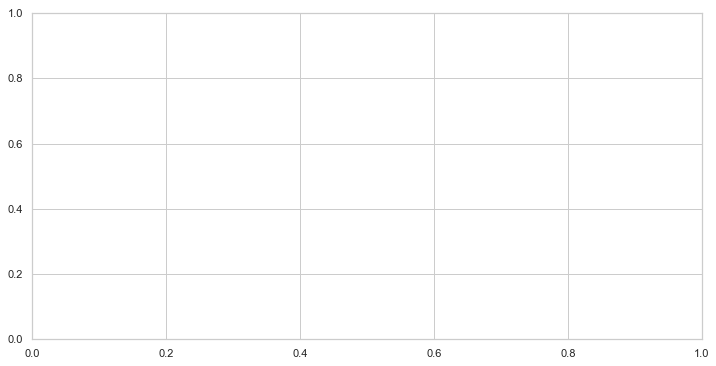

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,18))
sns.boxplot(data = df['num_gestacoes'], ax= ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,220, 5))
sns.boxplot(data = df['glicose'], ax= ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,110, 5))
sns.boxplot(data = df['pressao_sanguinea'], ax= ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(10,50, 5))
sns.boxplot(data = df['grossura_pele'], ax= ax, width=.5)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,300, 20))
sns.boxplot(data = df['insulina'], ax= ax, width=2)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,70, 2))
sns.boxplot(data = df['bmi'], ax= ax, width=.5)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(np.arange(0,2.5, .2))
sns.boxplot(data = df['indice_historico'], ax= ax, width=.5)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(20,90, 2))
sns.boxplot(data = df['idade'], ax= ax, width=.5)

In [73]:
#removing outliers
df['num_gestacoes'] = [0 if x<0 else 13 if x>13 else x for x in df['num_gestacoes']]
df['glicose'] = [45 if x<45 else 200 if x>200 else x for x in df['glicose']]
df['pressao_sanguinea'] = [40 if x<40 else 104 if x>104 else x for x in df['pressao_sanguinea']]
df['grossura_pele'] = [10 if x<10 else 45 if x>45 else x for x in df['grossura_pele']]
df['insulina'] = [20 if x<20 else 250 if x>250 else x for x in df['insulina']]
df['bmi'] = [18 if x<18 else 50 if x>50 else x for x in df['bmi']]
df['indice_historico'] = [.1 if x<.1 else 1.2 if x>1.2 else x for x in df['indice_historico']]
df['idade'] = [21 if x<21 else 64 if x>64 else x for x in df['idade']]

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

### Now, let's normalize everything.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
params = list(df.drop(['id','classe'], axis = 1).columns)

In [74]:
df[params] = scaler.fit_transform(df[params])

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

### Train/Teste split

In [60]:
x = df[params]
y = df['classe']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .2, random_state = 666)

### We know that our data is unbalanced, let's apply SMOTE technique to deal with that.

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=666)
xtrain, ytrain = sm.fit_sample(xtrain, ytrain.ravel())

In [51]:
pd.Series(ytrain).value_counts()

1    317
0    317
dtype: int64

### And run some tests with MLP

In [38]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp = MLPClassifier(verbose=False, max_iter=3000, tol=0.0001, solver = 'adam',
                   activation= 'relu')

In [63]:
model = mlp.fit(xtrain,ytrain)

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
model.score(xtest,ytest)

0.65

### Not so good. Let's do some Feature Selection

In [ ]:
sns.heatmap(df.drop('id', axis = 1).corr(), annot=True)

In [65]:
mlp = MLPClassifier(verbose=False, max_iter=2000, tol=0.0001, solver = 'adam',
                   activation= 'relu', hidden_layer_sizes= (40), random_state=666)
x = df[[ 'glicose','idade','bmi','num_gestacoes','indice_historico']]
y = df['classe']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .2, random_state = 666)
#sm = SMOTE(random_state=666)
#xtrain, ytrain = sm.fit_sample(xtrain, ytrain.ravel())
model = mlp.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7583333333333333

In [78]:
pred = model.predict(df[[ 'glicose','idade','bmi','num_gestacoes','indice_historico']])

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        75
           1       0.70      0.62      0.66        45

   micro avg       0.76      0.76      0.76       120
   macro avg       0.74      0.73      0.74       120
weighted avg       0.75      0.76      0.76       120



In [69]:
print(confusion_matrix(ytest, pred))

[[63 12]
 [17 28]]


### Not good.
### Will try different ML types with different Preprocessing combinations

In [94]:
submit = pd.concat([df['id'], pd.Series(pred)], axis=1)

In [95]:
submit.columns = ['id', 'classe']

In [98]:
submit.to_csv('submission.csv', index=False)

### Tryed submit the test data prediction. Didn't get any improvement :(